# Communicate Data Findings project
# Udacity: DAND - Rodolfo Yoshii
# Dataset: Prosper Loan Data

## Project justification:
### The objective of this project is to analyze a dataset of loans information. Through various programmatic techniques I will provide some interesting insights via visualizations, describing the factors, effects and possibly answering certain hypothesis from the provided dataset.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load file into notebook
df_original=pd.read_csv('prosperLoanData.csv')

In [3]:
# Right after loading the data, it's a good idea to work on a copy
df = df_original.copy()

### The dataset required some preliminary cleaning and small adjustments to be able to properly analyze the data
#### Those wrangling steps are not presented in this presentation, but the code works behind the scenes to render the following presentation readable and easy to follow. The original dataset consists of 113,936 observations and it has 81 different variables.

#### After that wrangling work these were some of the initial hypothesis that came to my mind:
- What are the popular reasons why people ask for loans (Listing Category)
- Do Prosper clients' have a good credit grading?
- Can we profile the type of most profitable client?
- And, can we profile the type of client that might default?
- How large are the amounts of loans? 
- Is there a correlation between certain variables?
- Is the location of a borrower a factor of whether or not they are good clients?

In [4]:
# First glance at dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
# Data cleaning, some variables need to be changed to the correct data type:
# CreditGrade should be qualitative ordinal:
# Code to change datatype to ordinal:
ordinal_var = {'CreditGrade': ['AA','A','B','C','D', 'E', 'HR', 'NC']}

for var in ordinal_var:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var[var])
    df[var] = df[var].astype(ordered_var)

In [6]:
# I validate the variable has been changed:
df['CreditGrade'].dtype

CategoricalDtype(categories=['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'], ordered=True)

In [7]:
# 4 variables need to be changed to datetime:
df[['ListingCreationDate','ClosedDate', 'DateCreditPulled', 'LoanOriginationDate']] = df[['ListingCreationDate','ClosedDate', 'DateCreditPulled', 'LoanOriginationDate']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

In [8]:
# I validate the variables have been changed:
print(df['ListingCreationDate'].dtype)
print(df['ClosedDate'].dtype)
print(df['DateCreditPulled'].dtype)
print(df['LoanOriginationDate'].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [9]:
# First I wanted to know the reasons why Prosper clients were borrowing
# I create a series of the listing categories
reasons = df['ListingCategory (numeric)'].value_counts()

In [10]:
# Then I convert the series to a dataframe
reasons.to_frame()

,ListingCategory (numeric)
1,58308
0,16965
7,10494
2,7433
3,7189
6,2572
4,2395
13,1996
15,1522
18,885


### The top 5 listing category codes are:
1) Debt Consolidation 58308
0) Not Available 16965
7) Other 10494
2) Home Improvement 7433
3) Business 7189

#### Debt consolidation is the top reason of Prosper borrowers  at 51.2% of all their loans fall under this category
The other two categories that are clearly defined in the top 5 are Home Improvement (6.5%) and Business (6.3%), so with this information Prosper management can focus their efforts when making strategic decisions on how to attract potential clients in the future.


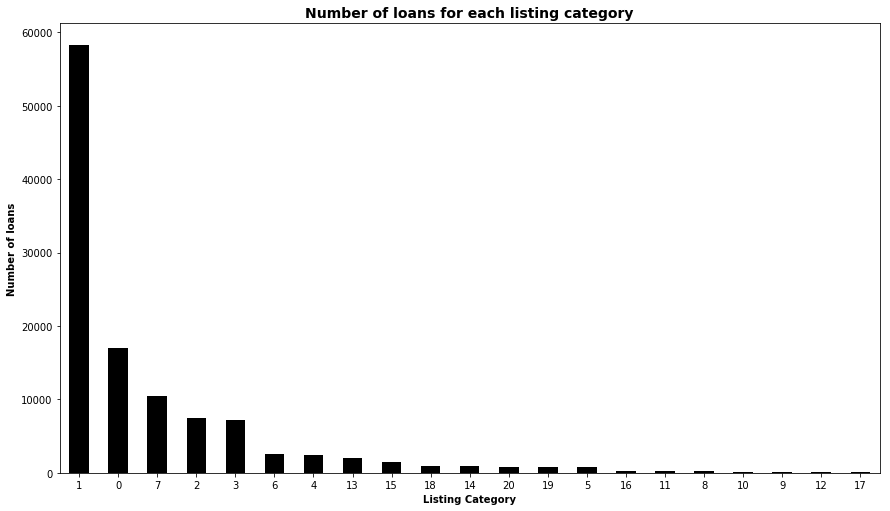

In [36]:
# Here now I'm able to plot the bar chart and add the chart title and Y and X axist titles
plt.figure(figsize=[14.70, 8.27])
reasons.plot.bar(y='ListingCategory (numeric)', rot = 0, color='black');
plt.xlabel('Listing Category', weight = "bold")
plt.ylabel('Number of loans', weight = "bold")
plt.title('Number of loans for each listing category', fontsize = 14, weight = "bold");

In [14]:
# Percentage of debt consolidation as reason from all categories
print("Debt consolidation: ",reasons[1]/reasons.sum())
print("Home Improvement: ",reasons[2]/reasons.sum())
print("Business: ",reasons[3]/reasons.sum())



Debt consolidation:  0.5117564970115064
Home Improvement:  0.06523780685817601
Business:  0.06309627250147011


### Once we understand what Prosper clients are using the loaned money for, another natural question to ask is whether or not those clients are credit worthy.
#### The following chart shows us the number of clients falling the different credit rating
We can observe the credit rates C is the top 1, followed by D, B and AA.
It seems to be a balanced ratio of good credit (AA) and average credit worthyness, this is important to reduce the risk of default

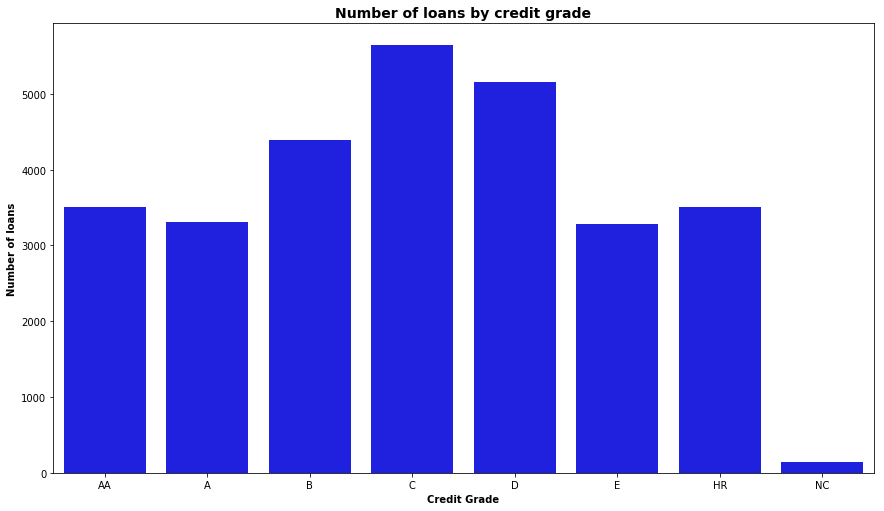

In [37]:
# The below bar chart shows that AA credit grades are not the most common, the majority are C and D
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data=df, x='CreditGrade', color='blue');
plt.xlabel('Credit Grade', weight = "bold")
plt.ylabel('Number of loans', weight = "bold")
plt.title('Number of loans by credit grade', fontsize = 14, weight = "bold");

### Given the previous breakdown of the credit grading, we can corroborate the the balance number of good borrower's grading is reflected in the loan status of Prosper

#### Only a small portion of the loans have been recorded as defaulted of past due.
Perhaps an area of interest is paying attention to the amount of charged off ("an amount of debt is unlikely to be collected." - Wikipedia), which is somehow significant at 11,992 listings flagged as such.

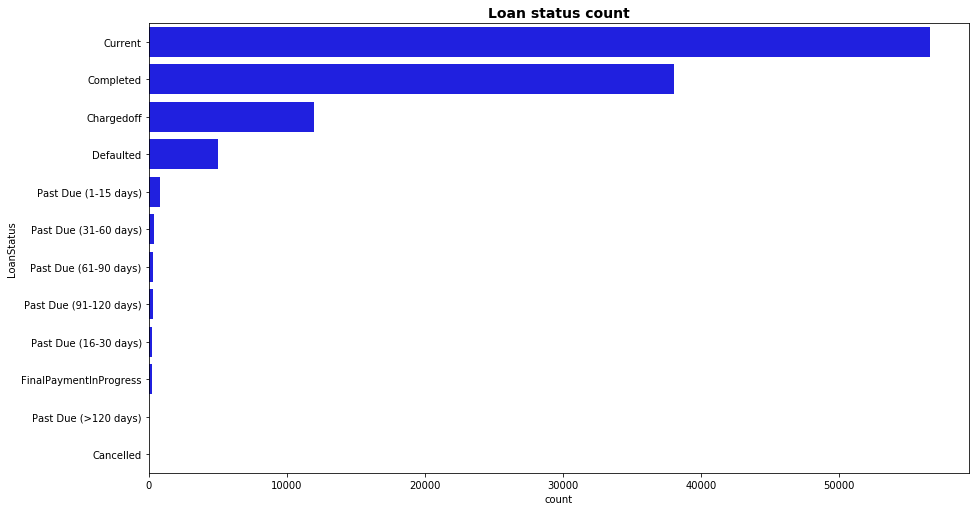

In [38]:
# The Y axis is better in this case, converting it to a horizontal bar chart
plt.figure(figsize=[14.70, 8.27])
status_order=df['LoanStatus'].value_counts().index
sns.countplot(data=df, y='LoanStatus', color='blue', order=status_order);
plt.title('Loan status count', fontsize = 14, weight = "bold");


In [30]:
# Some information about the value counts of Loan Status
df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

### Let's take a look at a list of the borrowers' State of origin
#### The results can be expected as the Top 3 States simply follow the population density of the United States

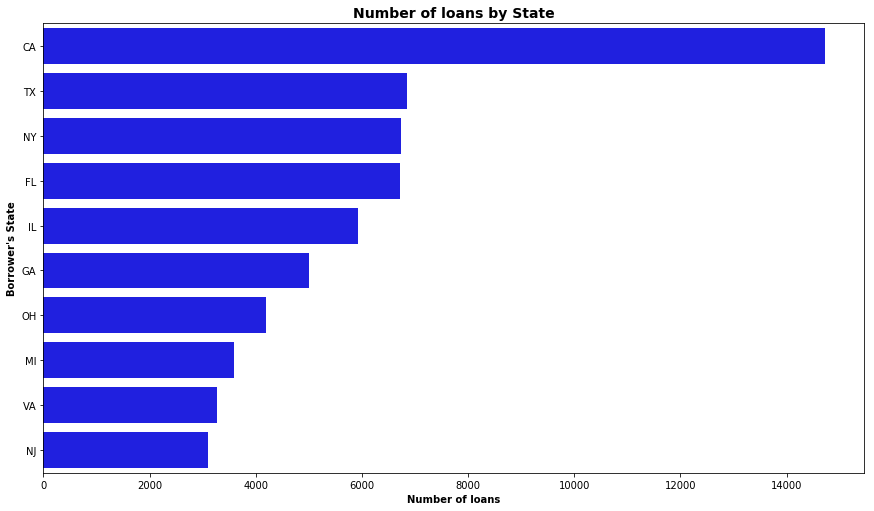

In [39]:
# Another univariate analysis could be the borrower State, it seems like the pattern follows the general population
# density of the United States
# With the intetion to plot only the Top 10 I only pass the first 10 to the index
plt.figure(figsize=[14.70, 8.27])
state_order=df['BorrowerState'].value_counts().index[:10]
sns.countplot(data=df, y='BorrowerState', color='blue', order=state_order);
plt.xlabel('Number of loans', weight = "bold")
plt.ylabel('Borrower\'s State', weight = "bold")
plt.title('Number of loans by State', fontsize = 14, weight = "bold");

### In the following set of bar charts we can observe a new dimension of the credit grading and listing categories
#### In the first horizontal bar chart:
We can observe clearly that full-time employment status has the vast majority of loans granted as well, the chart also provides a visual cue on how the credit grading is positive as depicted with lighter hues of blue.

#### In the second bar chart:
We can observe that the majority of the listings appear to be code zero (Not available), followed by the category 1 (Debt consolidation).

#### In the third bar chart:
We present how the most popular loan term is 3 years in all listing categories this happens to be the case. Clearly debt consolidation appears to be the top category with the most number of observations.


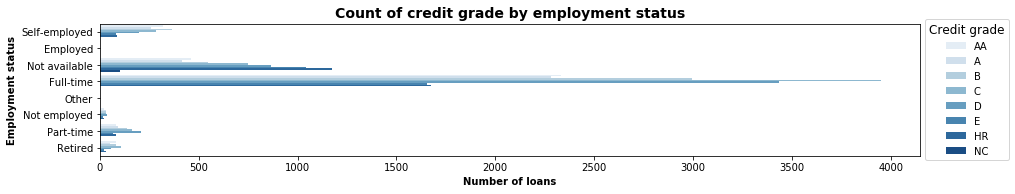

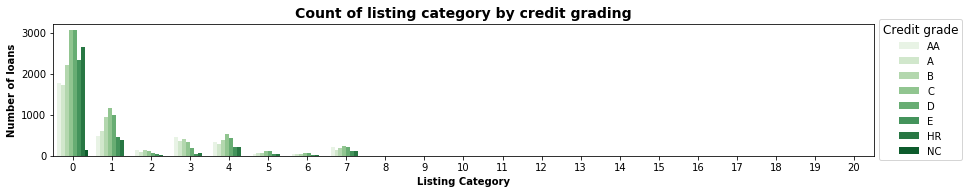

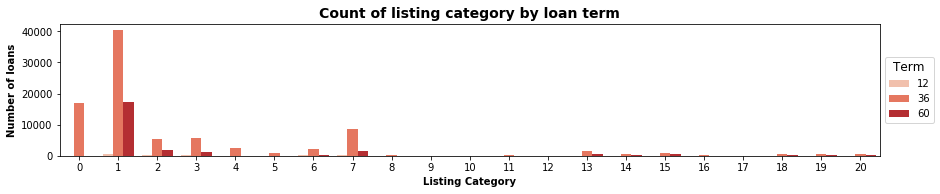

In [71]:
# Here I create 3 subplot of different categorical variables
plt.figure(figsize=[14.70, 8.27])

# subplot 1: EmploymentStatus vs CreditGrade
plt.subplot(3, 1, 1)
sns.countplot(data = df, y = 'EmploymentStatus', hue = 'CreditGrade', palette = 'Blues')
plt.xlabel('Number of loans', weight = "bold")
plt.ylabel('Employment status', weight = "bold")
plt.title('Count of credit grade by employment status', fontsize = 14, weight = "bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Credit grade", title_fontsize = 12);

# subplot 2: ListingCategory vs. CreditGrade, use different color palette
plt.figure(figsize=[14.70, 8.27])
ax = plt.subplot(3, 1, 2)
sns.countplot(data = df, x = 'ListingCategory (numeric)', hue = 'CreditGrade', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xlabel('Listing Category', weight = "bold")
plt.ylabel('Number of loans', weight = "bold")
plt.title('Count of listing category by credit grading', fontsize = 14, weight = "bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Credit grade", title_fontsize = 12);

# subplot 3: ListingCategory vs. Term, use different color palette
plt.figure(figsize=[14.70, 8.27])
ax = plt.subplot(3, 1, 3)
sns.countplot(data = df, x = 'ListingCategory (numeric)', hue = 'Term', palette = 'Reds')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xlabel('Listing Category', weight = "bold")
plt.ylabel('Number of loans', weight = "bold")
plt.title('Count of listing category by loan term', fontsize = 14, weight = "bold");
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="Term", title_fontsize = 12);

plt.show()

### The following color coded scatterplot provides an interesting insight on how the Prosper rating (color) "progresses" to the right of the x axis of Estimated returns.

#### Insight on estimated return on Prosper rating:
The estimated returns seem to be quite consistent (between slightly above zero to 0.2 percent) in most of the Prosper ratings 3 and above. The ratings 1 and 2 tend to have negative estimated returns which is an expected situation.

#### Insight on correlation
As it can be observed there's an almost perfect positive correlation between the Estimated return and the Borrower's rate. This is an obvious observation as the higher the borrower rate it means that Prosper can expect to charge more interests from the loan.

#### Since there's overlapping on the color coding for the Prosper rating I will segregate the scatterplots by Prosper rating in the following chart.




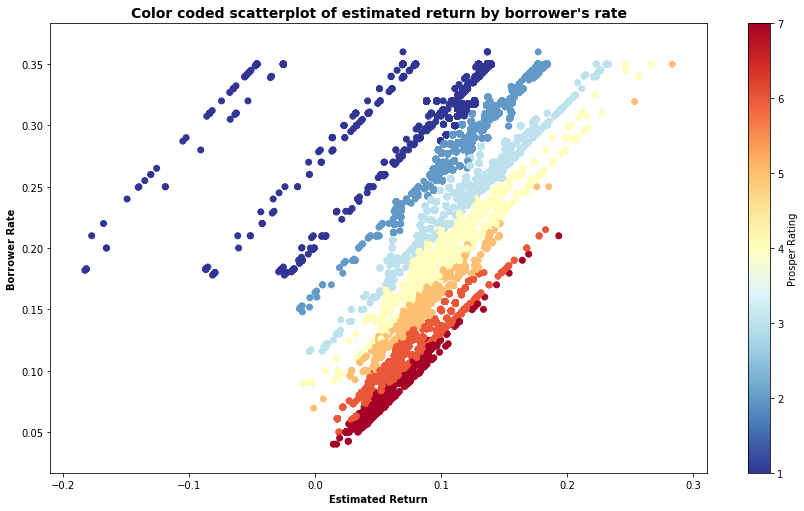

In [72]:
# I have a scatter plot with 3 numeric variables in the X and Y axis (same as presented in the bivariate section)
# Plus adding a categorical variable Prosper Rating
plt.figure(figsize=[14.70, 8.27])

plt.scatter(data = df, x = 'EstimatedReturn', y = 'BorrowerRate', c = 'ProsperRating (numeric)', cmap='RdYlBu_r')
plt.colorbar(label = 'Prosper Rating')
plt.xlabel('Estimated Return', weight = "bold")
plt.ylabel('Borrower Rate', weight = "bold")
plt.title('Color coded scatterplot of estimated return by borrower\'s rate', fontsize = 14, weight = "bold");

# Interesting to see that higher Prosper Ratings do tend to be on the right side of the chart, while the best 
# borrower rates do coincide with having a good Prosper Rating and not such a higher level of Estimated Return 

### The next set of scatterplots represent the previous single color coded, but this time they are separated by each Prosper Rating level

#### Insight on each rating:
Once we treat each level of Prosper rating as a different category we can clearly see the differences in both the borrower rates and the estimated returns. Although the correlation seems to be the same, except for the lower rating (1), we can observe how the highest Prosper rating of 7 has the lowest levels of borrower rates.
This is an expected observation as clients with a stronger credit worthiness have much lower risk to default thus they can potentially enjoy lower levels of borrowing rates.


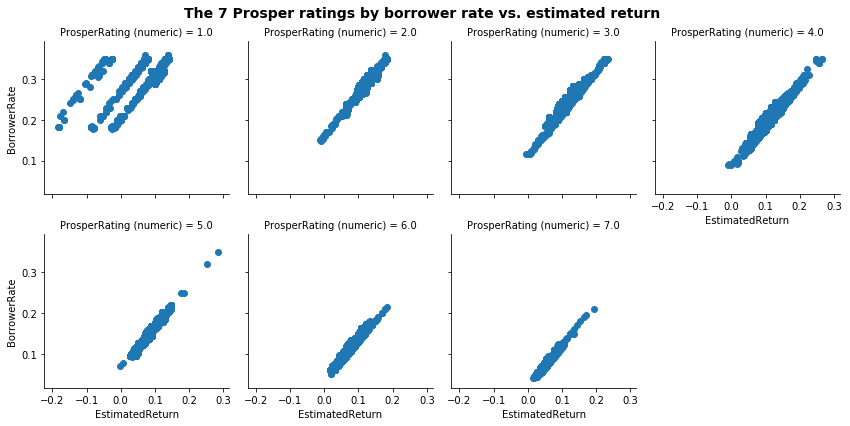

In [75]:
# Another way to dissect the above chart is by using FacetGrid of multiple bivariate scatterplots
g = sns.FacetGrid(data = df, col = 'ProsperRating (numeric)', col_wrap = 4, margin_titles = True);
g.map(plt.scatter, 'EstimatedReturn', 'BorrowerRate');
plt.subplots_adjust(top=0.9);
g.fig.suptitle('The 7 Prosper ratings by borrower rate vs. estimated return', fontsize = 14, weight = "bold");

# This chart is clearer as it depicts in each of the 7 categories of Prospec Rating
# Interesting to see how the perfectly positive correlation tends to move from the upper left quadrant to the
# lower right quadrant

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 590253 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slide_deck_template.slides.html
Use Control-C to stop this server
